##  PURPOSE OF THIS NOTEBOOK IS TO CHECK IF ATTOM DATA SOLUTIONS API QUERY WORKS AND DEBUG AS NECESSARY

In [1]:
import requests
import json

## Attempted to fetch some data from ATTOM. See if query works

https://api.developer.attomdata.com/docs#!/Sales32Trend32by32Quarter/getSalesTrendByQuarter

In [2]:
baseurl = 'https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/address'
queryparams = {'postalcode':94536,
         'propertytype': 'TOWNHOUSE/ROWHOUSE', 
         'pagesize': 3}
headers = {'apikey': '522739f66b76ac63523c45dab14c3aa9', 'accept': 'application/JSON'}

In [3]:
response = requests.get(baseurl, params = queryparams,headers=headers)
response.url


'https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/address?postalcode=94536&propertytype=TOWNHOUSE%2FROWHOUSE&pagesize=3'

In [4]:
pydata = response.json()    # pydata is a python list/dictionary NOT JSON
pydata = pydata['property']


In [5]:
# UNCOMMENT TO SEE
#print(json.dumps(pydata, indent = 3))

In [6]:
with open('exported.txt', 'w') as outfile:
    json.dump(pydata, outfile)

In [7]:
import pandas as pd
with open('exported.txt') as project_file:    
    data = json.load(project_file)  

df = pd.json_normalize(data)


In [8]:
df.shape

(3, 22)

In [10]:
pd.set_option('display.max_columns', 500)
df.head()

,identifier.Id,identifier.fips,identifier.apn,identifier.apnOrig,identifier.attomId,address.country,address.countrySubd,address.line1,address.line2,address.locality,address.matchCode,address.oneLine,address.postal1,address.postal2,address.postal3,location.accuracy,location.latitude,location.longitude,location.distance,location.geoid,vintage.lastModified,vintage.pubDate
0,5109917,06001,501 163007500,501163007500,5109917,US,CA,3768 COLET TER,"FREMONT, CA 94536",FREMONT,ExaStr,"3768 COLET TER, FREMONT, CA 94536",94536,6005,C061,Rooftop,37.554617,-121.995952,0.0,"CO06001, CS0691070, DB0614400, ND0000000924, R...",2021-4-8,2021-4-8
1,10851195,06001,501 060717000,501060717000,10851195,US,CA,37631 MURIETTA TER,"FREMONT, CA 94536",FREMONT,ExaStr,"37631 MURIETTA TER, FREMONT, CA 94536",94536,6644,C060,Rooftop,37.545177,-122.012501,0.0,"CO06001, CS0691070, DB0614400, ND0000000927, P...",2021-4-8,2021-4-8
2,20409996,06001,507 042010200,507042010200,20409996,US,CA,38604 ROYAL ANN CMN,"FREMONT, CA 94536",FREMONT,ExaStr,"38604 ROYAL ANN CMN, FREMONT, CA 94536",94536,4218,C085,Rooftop,37.566768,-121.971207,0.0,"CO06001, CS0691070, DB0614400, ND0004779170, P...",2021-4-8,2021-4-8


## conclusion: learnt to fetch data 
## convert responseobject ---> python list of dictionary of lists ---> write to file---> convert to pandas

## Fetch all counties in California FIPS ID

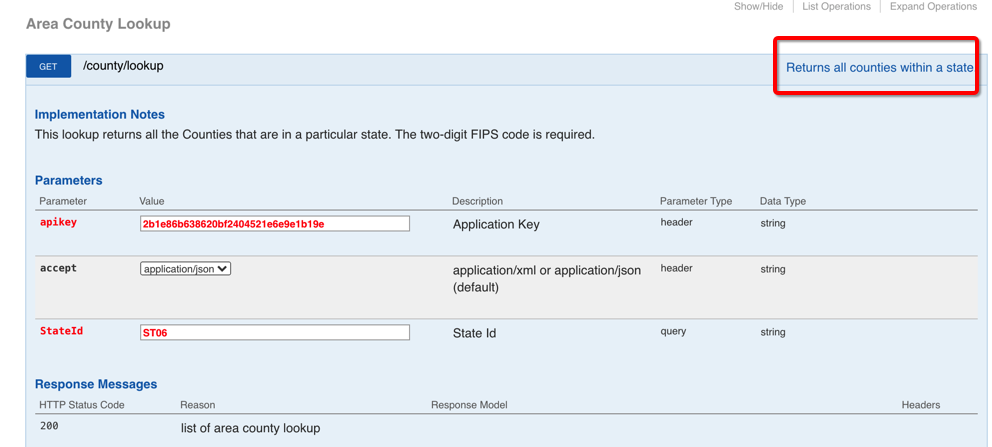

In [203]:

baseurl = 'https://api.gateway.attomdata.com/areaapi/v2.0.0/county/lookup'
queryparams = {'StateId':'ST06'}
headers = {'apikey': '522739f66b76ac63523c45dab14c3aa9', 'accept': 'application/JSON'}


response = requests.get(baseurl, params = queryparams,headers=headers)
pydata = response.json()
pydata

{'response': {'inputparameter': {'package': 'lookup',
   'resource': 'county',
   'service': 'Area',
   'StateId': 'ST06'},
  'result': {'package': {'descr': 'This lookup returns all the Counties that are in a particular state. The State ID is required. The two-digit FIPS code or the two-letter abbreviation can be used for the State ID.',
    'item': [{'geo_center_latitude': '37.6471390000',
      'geo_center_longitude': '-121.9124880000',
      'geo_key': 'CO06001',
      'id': 'CO06001',
      'name': 'Alameda',
      'type': 'CO'},
     {'geo_center_latitude': '38.6217830000',
      'geo_center_longitude': '-119.7983520000',
      'geo_key': 'CO06003',
      'id': 'CO06003',
      'name': 'Alpine',
      'type': 'CO'},
     {'geo_center_latitude': '38.4435500000',
      'geo_center_longitude': '-120.6538560000',
      'geo_key': 'CO06005',
      'id': 'CO06005',
      'name': 'Amador',
      'type': 'CO'},
     {'geo_center_latitude': '39.6659590000',
      'geo_center_longitude': '

In [23]:
# parsing the results to reach inner nest
pydata = pydata['response']['result']['package']['item']

In [29]:
with open('counties.txt', 'w') as outfile:
    json.dump(pydata, outfile)
with open('counties.txt') as project_file:    
    data = json.load(project_file)  

df_counties = pd.json_normalize(data)
df_counties  

,geo_center_latitude,geo_center_longitude,geo_key,id,name,type
0,37.6471390000,-121.9124880000,CO06001,CO06001,Alameda,CO
1,38.6217830000,-119.7983520000,CO06003,CO06003,Alpine,CO
2,38.4435500000,-120.6538560000,CO06005,CO06005,Amador,CO
3,39.6659590000,-121.6019190000,CO06007,CO06007,Butte,CO
4,38.1839000000,-120.5614420000,CO06009,CO06009,Calaveras,CO
...,...,...,...,...,...,...
69,34.3587420000,-119.1331430000,CO06111,CO06111,Ventura,CO
70,40.7313200000,-119.6632700000,CO32031,CO32031,Washoe,CO
71,38.6795960000,-121.9024410000,CO06113,CO06113,Yolo,CO
72,39.2701300000,-121.3442590000,CO06115,CO06115,Yuba,CO


In [42]:
# extract geoIDs for counties and put them in a list
county_geoids = list(df_counties['id'])
# show first 10 county geoIDs out of 74
county_geoids[:10]

['CO06001',
 'CO06003',
 'CO06005',
 'CO06007',
 'CO06009',
 'CO32510',
 'CO32003',
 'CO06011',
 'CO06013',
 'CO41015']

## there are 74 counties in california each with an ID or geoid

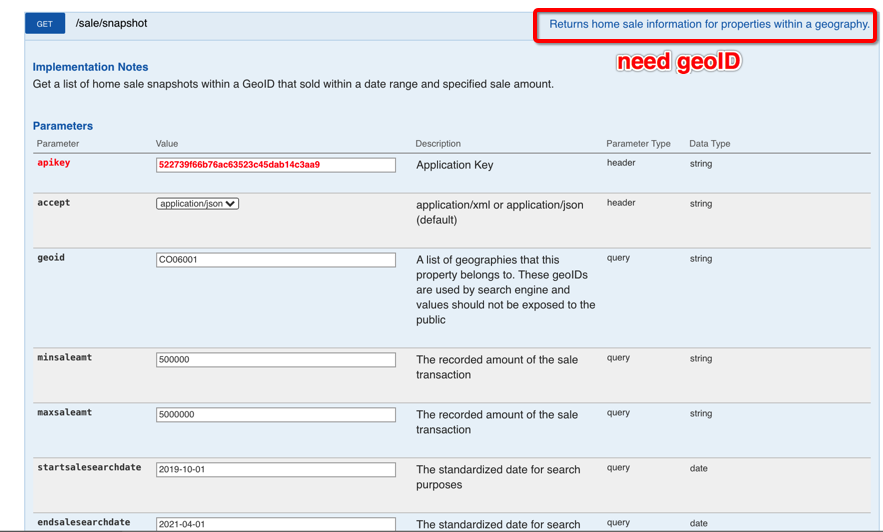

In [196]:
# For each county, we'll make 1 API call and generated 1 text file containing sales data  
# county_geoids is the LIST of all 74 counties in California

# following function pulls all sales data between 1/2 million and 5 million dollars from start of covid
# function takes as input the geoID of the county 
# function outputs a generated text file containing JSON of all SALES transactions between $0.5M and $5M in that county
# function has defaults of from date of 1st Oct 2019 upto 1st april 2021. These can be changed as desired.
# i've set pagesize to 50,000 records for each county.

def salesdata_scraper_bycounty(county_geoid,from_date ='2019-10-01', to_date ='2021-04-01'): 
    baseurl = 'https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/snapshot'
    queryparams = {'geoid':county_geoid, 
               'minsaleamt': 500000,
               'maxsaleamt': 5000000, 
              'startsalesearchdate':from_date,
               'endsalesearchdate': to_date,
                'pagesize' :50000}        
    headers = {'apikey': '3cbddf84d80b7280b0250c8a0208ed62', 'accept': 'application/JSON'}
    response = requests.get(baseurl, params = queryparams,headers=headers)
    pydata = response.json()         # converting response object to python list of dictionaries
    if pydata['status']['total'] > 0:   # this condition is to avoid writing empty files in case of zero transactions in a county
        pydata = pydata['property']   # this is to reach inner nested part where our results lie
        with open(county_geoid, 'w') as outfile:   # The name of each file will be CO06001, CO06003, etc.74 files created            
            json.dump(pydata, outfile) 
    

In [201]:
# Following happened when API calls exceeded per minute. Created NEW API key on my gmail account as above
salesdata_scraper_bycounty(county_geoids[50])

## Cannot iterate all 74 counties in 1 for loop. API request times out/doesn't return status header. Its blank. Had to do in 7 batches of 10 calls each per for loop as belo.

In [200]:
for county_geoid in county_geoids[70:]:   # change [0:10], [10:20], [20:30], etc
    salesdata_scraper_bycounty(county_geoid)
print('done')

done


## Following shows each of the 71 files can be imported into a dataframe for processing. There will be 1 dataframe for 1 county.

In [209]:
with open('CO06027') as project_file:   # open 1 of the 71 JSON files created and read them as dataframe
        data = json.load(project_file)  
df = pd.json_normalize(data)   

print(df.shape)
df.head()

(74, 43)


,identifier.obPropId,identifier.fips,identifier.apn,identifier.apnOrig,identifier.attomId,lot.lotSize1,address.country,address.countrySubd,address.line1,address.line2,address.locality,address.matchCode,address.oneLine,address.postal1,address.postal2,address.postal3,location.accuracy,location.elevation,location.latitude,location.longitude,location.distance,location.geoid,summary.propclass,summary.propsubtype,summary.proptype,summary.yearbuilt,summary.propLandUse,summary.propIndicator,building.size.universalsize,building.rooms.bathstotal,building.rooms.beds,vintage.lastModified,vintage.pubDate,sale.salesearchdate,sale.saleTransDate,sale.amount.saleamt,sale.amount.salecode,sale.amount.salerecdate,sale.amount.saledisclosuretype,sale.amount.saledocnum,sale.amount.saletranstype,sale.calculation.priceperbed,sale.calculation.pricepersizeunit
0,15740588306027,06027,01107047,1107047,157405883,1.5800,US,CA,283 S MOUNTAIN VIEW RD,"BISHOP, CA 93514",Bishop,ExaStr,"283 S MOUNTAIN VIEW RD, BISHOP, CA 93514",93514,2116,C004,Street,0.0,37.364598,-118.445522,0.0,"CO06027, CS0690250, DB0601409, PL0684120, SB00...",Single Family Residence / Townhouse,HOUSE,SFR,1997,SFR,10,3249,3.0,3,2020-3-27,2020-3-27,2019-10-8,2019-10-8,830000,SALE PRICE (FULL) Full sales price as per docu...,2019-11-5,0,0000002893,Resale,276667,255
1,4598097306027,06027,00118107,118107,45980973,0.3788,US,CA,201 S MAIN ST,"BISHOP, CA 93514",Bishop,ExaStr,"201 S MAIN ST, BISHOP, CA 93514",93514,3416,C005,Street,0.0,37.359900,-118.395423,0.0,"CO06027, CS0690250, DB0601409, PL0606798, SB00...",Retail,COMMERCIAL,STORE BUILDING,1954,STORE BUILDING,25,16492,0.0,0,2019-11-11,2019-11-11,2019-10-11,2019-10-11,2657000,SALE PRICE (FULL) Full sales price as per docu...,2019-10-21,0,0000002774,Resale,0,161
2,15740620706027,06027,01227003,1227003,157406207,0.5000,US,CA,245 ARCTURIS CIR,"BISHOP, CA 93514",Bishop,ExaStr,"245 ARCTURIS CIR, BISHOP, CA 93514",93514,7053,R001,Street,0.0,37.322746,-118.540128,0.0,"CO06027, CS0690250, DB0601409, SB0000068690, S...",Single Family Residence / Townhouse,HOUSE,SFR,1996,SFR,10,2507,3.0,2,2019-11-29,2019-11-29,2019-10-17,2019-10-17,550000,SALE PRICE (FULL) Full sales price as per docu...,2019-11-18,0,0000002991,Resale,275000,219
3,4019787806027,06027,01151014,1151014,40197878,0.4400,US,CA,2794 CAROL LN,"BISHOP, CA 93514",Bishop,ExaStr,"2794 CAROL LN, BISHOP, CA 93514",93514,3022,C006,Street,0.0,37.350874,-118.431102,0.0,"CO06027, CS0690250, DB0601409, PL0684120, SB00...",Single Family Residence / Townhouse,HOUSE,SFR,1989,SFR,10,2991,3.0,4,2019-12-13,2019-12-13,2019-10-25,2019-10-25,660000,SALE PRICE (FULL) Full sales price as per docu...,2019-11-25,0,0000003060,Resale,165000,221
4,15740617406027,06027,01215104,1215104,157406174,1.1000,US,CA,586 ROCKING K RD,"SWALL MEADOWS, CA 93514",Swall Meadows,ExaStr,"586 ROCKING K RD, SWALL MEADOWS, CA 93514",93514,3701,R002,Street,0.0,37.358323,-118.483983,0.0,"CO06027, CS0690250, DB0601409, PL0684120, SB00...",Vacant,RESIDENTIAL,RESIDENTIAL ACREAGE,0,RESIDENTIAL ACREAGE,80,0,0.0,0,2020-1-3,2020-1-3,2019-11-7,2019-11-7,575000,SALE PRICE (FULL) Full sales price as per docu...,2019-12-17,0,0000003270,Resale,0,0
